In [1]:
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from itertools import cycle

In [2]:
y,sr= librosa.load(r"C:\Users\jasvi\Downloads\speechsignal.wav")

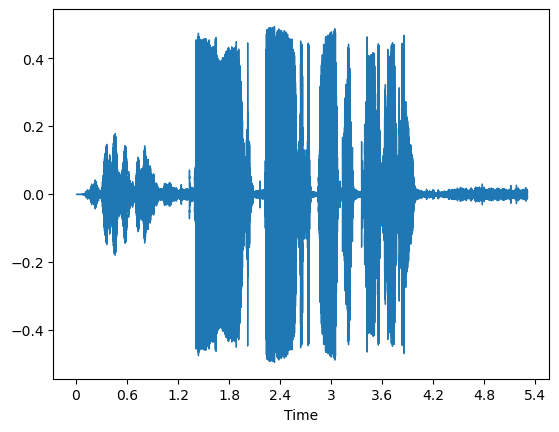

In [3]:
librosa.display.waveshow(y)

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the 
amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse 
transform the frequency spectrum to time domain signal

In [4]:
import numpy as np
arr1 = np.fft.fft(y)

In [5]:
arr1 #Speech signal in spectral domain

array([-3.53094946-3.77475828e-15j,  0.42807074-3.43217779e+00j,
        0.96896609+5.65233111e+00j, ..., -1.24051311+4.63085615e+00j,
        0.96896609-5.65233111e+00j,  0.42807074+3.43217779e+00j])

Text(0.5, 1.0, 'Amplitude part of the spectral components')

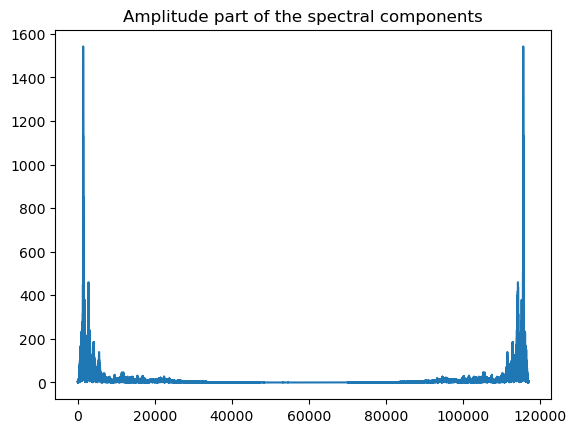

In [23]:
import matplotlib.pyplot as plt
plt.plot(np.abs(arr1))
plt.title("Amplitude part of the spectral components")

In [19]:
arr2= np.fft.ifft(arr1)
print("Inverse fourier transform of the frequency spectrum:",
      arr2) 

Inverse fourier transform of the frequency spectrum: [ 4.85722573e-17-1.31838984e-16j -1.04085645e-16+8.32639310e-17j
  5.55022041e-17+8.32726909e-17j ...  3.60836205e-03-1.01823525e-16j
  7.47827580e-03-9.11735677e-18j  2.42838221e-17+8.58694644e-17j]


Text(0, 0.5, 'Amplitude')

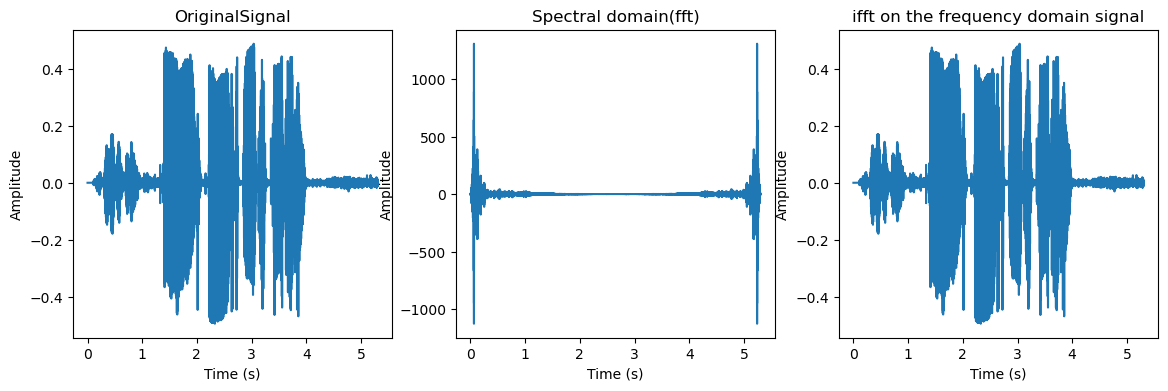

In [20]:
arr3=np.arange(0, len(y)/sr,1/sr)
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(arr3,y)
plt.title('OriginalSignal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.plot(arr3,arr1)
plt.title("Spectral domain(fft)")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 3)
plt.plot(arr3,arr2)
plt.title("ifft on the frequency domain signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse 
transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high 
pass frequencies of spectrum.


In [24]:
arr1 

array([-3.53094946-3.77475828e-15j,  0.42807074-3.43217779e+00j,
        0.96896609+5.65233111e+00j, ..., -1.24051311+4.63085615e+00j,
        0.96896609-5.65233111e+00j,  0.42807074+3.43217779e+00j])

In [28]:
print("maximum frequency in the speech signal is (in Hz): ", sr/2)

maximum frequency in the speech signal is (in Hz):  11025.0


In [36]:
time= 20e-3 #window length of length 20ms
samplingrate=22500
window_length = int(time*samplingrate)
print(window_length)

450


In [37]:
#Selecting the low frequency components

frequency_resolution=sr/len(y) #to distinguish the frequency components a minimum 
# spacing of frequency resolution is required
print("fr:",frequency_resolution)
cutoff_frequency=500 #below 500hz is considered low frequency
cutoff_index= int(cutoff_frequency/frequency_resolution)
print(cutoff_index)

# retrieving the low frequency components
fft_copy= np.copy(arr1) #copying the fft signal
fft_copy[cutoff_index+1:len(arr1)-cutoff_index]=0


fr: 0.18853566359423363
2652


Text(0.5, 1.0, 'Absolute part of the spectral components')

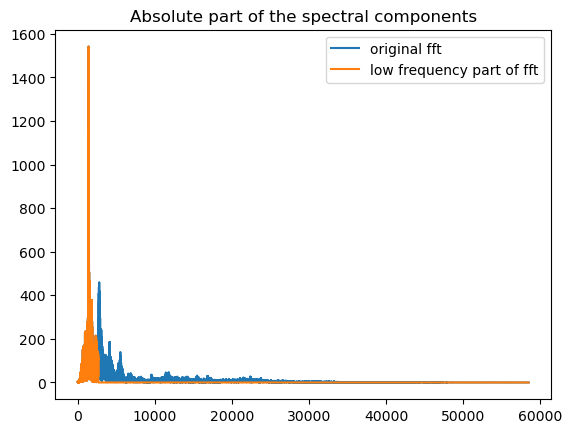

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.abs(arr1[1:len(arr1)//2]), label="original fft")
plt.plot(np.abs(fft_copy[1:len(arr1)//2]), label="low frequency part of fft")

plt.legend()
plt.title("Absolute part of the spectral components")

In [45]:
#Converting low filtered signal to time domain
low_signal = np.fft.ifft(fft_copy)
Audio(low_signal, rate=sr)

C:\Users\jasvi\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Inference: The signal length is same as the original signal. All the words spoken can be heard but in a muffled way. The low frequency components are heard in this Audio

In [55]:
# Bandpass filter band between 2000hz and 1000hz 
cutoff_frequency1=2000 
cutoff_frequency2=5000 # between 2000 and 5000hz is considered 
cutoff_index1= int(cutoff_frequency1/frequency_resolution)
cutoff_index2= int(cutoff_frequency2/frequency_resolution)
print(cutoff_index1)
print(cutoff_index2)


10608
26520


In [63]:
# retrieving the band pass frequency components
fft_copy1= np.copy(arr1) #copying the fft signal
fft_copy1[1:cutoff_index1]=0
fft_copy1[len(arr1)-cutoff_index1:len(arr1)]=0
fft_copy1[cutoff_index2:len(arr1)-cutoff_index2]=0

In [60]:
fft_copy1

array([-3.53094946-3.77475828e-15j,  0.42807074-3.43217779e+00j,
        0.96896609+5.65233111e+00j, ..., -1.24051311+4.63085615e+00j,
        0.96896609-5.65233111e+00j,  0.42807074+3.43217779e+00j])

In [64]:
bandpass_signal = np.fft.ifft(fft_copy1)
Audio(bandpass_signal, rate=sr)

Text(0.5, 1.0, 'Absolute part of the spectral components')

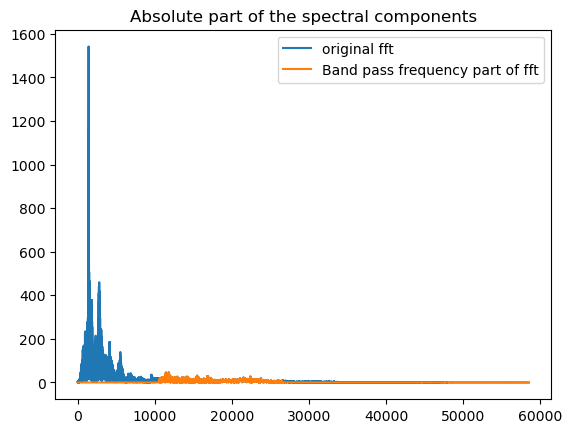

In [66]:
import matplotlib.pyplot as plt
plt.plot(np.abs(arr1[1:len(arr1)//2]), label="original fft")
plt.plot(np.abs(fft_copy1[1:len(arr1)//2]), label="Band pass frequency part of fft")

plt.legend()
plt.title("Absolute part of the spectral components")

In [67]:
#High pass filter
#Selecting the low frequency components

frequency_resolution=sr/len(y) #to distinguish the frequency components a minimum 
# spacing of frequency resolution is required
print("fr:",frequency_resolution)
cutoff_frequency=8000 #after 8000hz is considered high frequency
cutoff_index= int(cutoff_frequency/frequency_resolution)
print(cutoff_index)



fr: 0.18853566359423363
42432


In [68]:
# retrieving the high frequency components
fft_copy= np.copy(arr1) #copying the fft signal
fft_copy[0:cutoff_index]=0


In [69]:
highpass_signal = np.fft.ifft(fft_copy)
Audio(highpass_signal, rate=sr)

Text(0.5, 1.0, 'Absolute part of the spectral components')

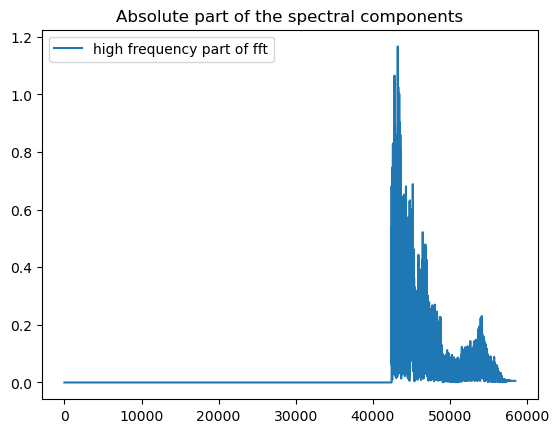

In [78]:
import matplotlib.pyplot as plt

plt.plot(np.abs(fft_copy[1:len(arr1)//2]), label="high frequency part of fft")

plt.legend()
plt.title("Absolute part of the spectral components")

Inference: The signal and the speech segments become clearer with high frequencies

A2. Repeat A2 with other filter types such as Cosine / Gausian filters.

900


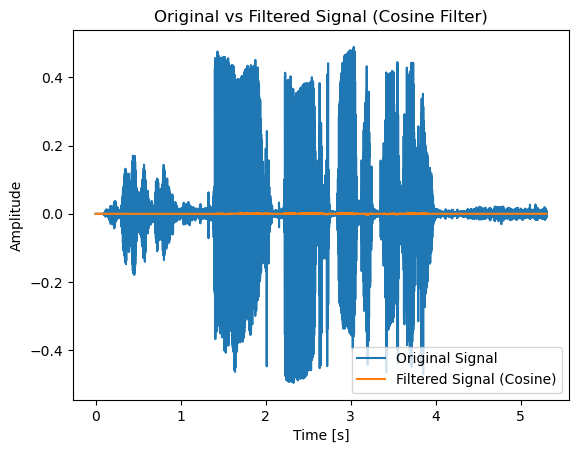

In [89]:
#Cosine filter

from scipy.signal import convolve


time= 40e-3
samplingrate=22500
window_length = int(time*samplingrate)
print(window_length)
arr3=np.arange(0, len(y)/sr,1/sr)
cosine_filter = np.cos(np.linspace(-np.pi/2, np.pi/2, window_length))

# Normalize the filter kernel
cosine_filter /= np.sum(cosine_filter)

# Apply the cosine filter to the signal using convolution
filtered_signal_cosine = convolve(y, cosine_filter, mode='same')

# Plot the original and filtered signals
plt.figure()
plt.plot(arr3,y, label='Original Signal')
plt.plot(arr3,filtered_signal_cosine, label='Filtered Signal (Cosine)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Signal (Cosine Filter)')
plt.legend()
plt.show()


In [87]:
Audio(filtered_signal_cosine, rate=sr)

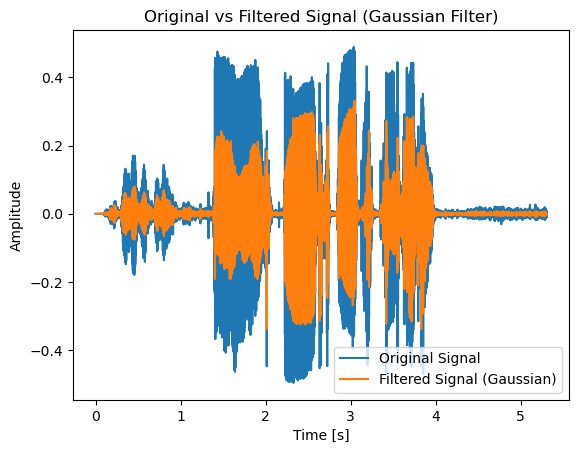

In [90]:
from scipy.ndimage import gaussian_filter1d

# Appling the Gaussian filter to the signal
sigma = 10  
gaussian_signal = gaussian_filter1d(y, sigma)
plt.figure()
plt.plot(arr3,y, label='Original Signal')
plt.plot(arr3,gaussian_signal, label='Filtered Signal (Gaussian)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Signal (Gaussian Filter)')
plt.legend()

plt.show()


In [91]:
Audio(gaussian_signal, rate=sr)